In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from data_helper_functions import *

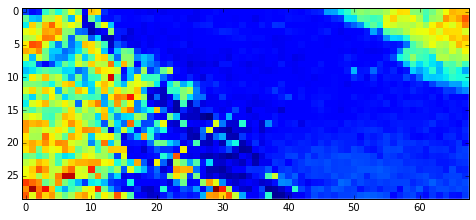

In [12]:
desired_channel = 'BAND_01'
desired_datetime = datetime(2014, 4, 2, 19)
desired_date = datetime(2014, 4, 2)
satellite_filefolder = 'data/satellite/colorado/summer6months/data/'
sensor_filefolder = 'data/sensor_data/colorado6months/'
pvoutput_filefolder = 'data/pvoutput/pvoutput6months/'

satellite_filename = find_filename(desired_datetime, desired_channel, satellite_filefolder)
lons, lats, data = return_satellite_data(satellite_filename, satellite_filefolder)

plt.figure(figsize=(8, 8))
imgplot = plt.imshow(data)
imgplot.set_interpolation('none')
plt.show()

In [8]:
sensor_filename = find_file_from_date(desired_date, sensor_filefolder)
return_sensor_data(sensor_filename, sensor_filefolder).head()

,nothing,Year,DOY,CR3000 CF Change [counts],CR3000 Zen Angle [degrees],Global LI-200 [W/m^2],Global CM22 (vent/cor) [W/m^2],Global RG780 PSP (vent/cor) [W/m^2],Global TSP-1 [W/m^2],Global CM6b (cor) [W/m^2],...,940nm POM-01 Photometer [uA],1020nm POM-01 Photometer [uA],315nm Obsolete AOD,400nm Obsolete AOD,500nm Obsolete AOD,675nm Obsolete AOD,870nm Obsolete AOD,940nm Obsolete AOD,1020nm Obsolete AOD,Research F2
datetime,,,,,,,,,,,,,,,,,,,,,
2014-04-02 07:00:00,0,2014,92,0,134.772833,-0.009406,-0.449218,-0.517958,2.597310,-0.796655,...,0,0,0,0,0,0,0,0,0,4.069917
2014-04-02 08:00:00,0,2014,92,0,131.055200,-0.011297,-0.471089,-1.027480,3.991239,-0.422282,...,0,0,0,0,0,0,0,0,0,4.901109
2014-04-02 09:00:00,0,2014,92,0,124.106767,-0.024742,-0.333829,-1.555230,3.605480,0.148241,...,0,0,0,0,0,0,0,0,0,5.122373
2014-04-02 10:00:00,0,2014,92,0,114.992833,-0.011246,-0.347603,-1.498180,4.630168,0.068331,...,0,0,0,0,0,0,0,0,0,4.925827
2014-04-02 11:00:00,0,2014,92,0,104.561862,-0.007310,-0.412273,-1.112791,6.063353,-0.281228,...,0,0,0,0,0,0,0,0,0,4.232360


In [10]:
pvoutput_filename = find_file_from_date(desired_date, pvoutput_filefolder)
return_pvoutput_data(pvoutput_filename, pvoutput_filefolder).head()

,Power
datetime,
2014-04-02 06:00:00,0
2014-04-02 07:00:00,0
2014-04-02 08:00:00,0
2014-04-02 09:00:00,0
2014-04-02 10:00:00,0
